In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from collections import defaultdict

current_directory = os.getcwd()

quic_tbf = defaultdict(dict)
h1_tbf = defaultdict(dict)
quic_loss = defaultdict(dict)
h1_loss = defaultdict(dict)

for filename in os.listdir(current_directory):
    if filename.endswith('.json'):
        with open(filename, 'r') as file:
            data = json.load(file)
                
            print(f"Processing {filename}...")
            if 'h1_tbf' in filename:
                h1_tbf[filename] = data
            elif 'quic_tbf' in filename:
                quic_tbf[filename] = data
            elif 'h1_netem' in filename:
                h1_loss[filename] = data
            elif 'quic_netem' in filename:
                quic_loss[filename] = data
            file.close()
                
        


  


Processing network_inspect_quic_netemLoss20_ucsd.json...
Processing network_inspect_quic_tbf5g32k70ms_ucsd.json...
Processing network_inspect_quic_tbf0.5m32k70ms_ucsd.json...
Processing network_inspect_h1_tbf0.5m32k70ms_ucsd.json...
Processing network_inspect_quic_tbf1g32k70ms_ucsd.json...
Processing network_inspect_quic_tbf100k32k70ms_ucsd.json...
Processing network_inspect_h1_tbf100k32k70ms_ucsd.json...
Processing network_inspect_quic_netemLoss5_ucsd.json...
Processing network_inspect_quic_ucsd.json...
Processing network_inspect_h1_netemLoss10_ucsd.json...
Processing network_inspect_quic_netemLoss50_ucsd.json...
Processing network_inspect_quic_tbf1m32k70ms_ucsd.json...
Processing network_inspect_quic_tbf50k32k70ms_ucsd.json...
Processing network_inspect_h1_netemLoss20_ucsd.json...
Processing network_inspect_h1_tbf50k32k70ms_ucsd.json...
Processing network_inspect_h1_tbf1g32k70ms_ucsd.json...
Processing network_inspect_h1_tbf5g32k70ms_ucsd.json...
Processing network_inspect_h1_tbf1m32

In [31]:
#print(quic_tbf.keys())

tc_order = ['50k', '100k','0.5m','1m','1g', '5g','10g']
quic_throughputs = []
h1_throughputs = []
for size in tc_order:
    for key in quic_tbf.keys():
        if size in key:
            print(size, key)
            quic_throughputs.append(quic_tbf[key][-1]['throughput'])
            break
    for key in h1_tbf.keys():
        if size in key:
            print(size, key)
            h1_throughputs.append(h1_tbf[key][-1]['throughput'])
            break
    print('-------')
    

50k network_inspect_quic_tbf50k32k70ms_ucsd.json
50k network_inspect_h1_tbf50k32k70ms_ucsd.json
-------
100k network_inspect_quic_tbf100k32k70ms_ucsd.json
100k network_inspect_h1_tbf100k32k70ms_ucsd.json
-------
0.5m network_inspect_quic_tbf0.5m32k70ms_ucsd.json
0.5m network_inspect_h1_tbf0.5m32k70ms_ucsd.json
-------
1m network_inspect_quic_tbf1m32k70ms_ucsd.json
1m network_inspect_h1_tbf1m32k70ms_ucsd.json
-------
1g network_inspect_quic_tbf1g32k70ms_ucsd.json
1g network_inspect_h1_tbf1g32k70ms_ucsd.json
-------
5g network_inspect_quic_tbf5g32k70ms_ucsd.json
5g network_inspect_h1_tbf5g32k70ms_ucsd.json
-------
10g network_inspect_quic_tbf10g32k70ms_ucsd.json
10g network_inspect_h1_tbf10g32k70ms_ucsd.json
-------


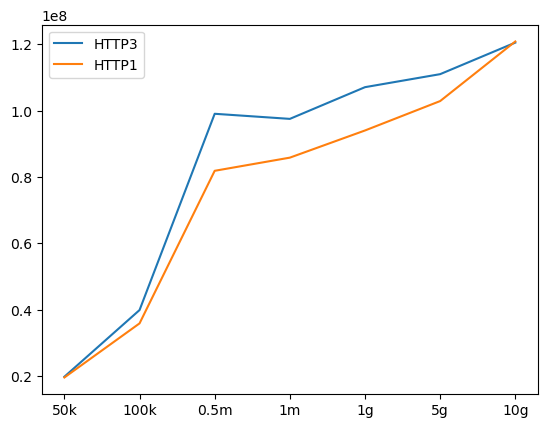

In [32]:

  
# plot lines
plt.plot(tc_order, quic_throughputs, label = "HTTP3")
plt.plot(tc_order, h1_throughputs, label = "HTTP1")

plt.legend()
plt.show()

In [33]:
loss_percent = ['Loss5', 'Loss10','Loss20','Loss50']
quic_throughputs = []
h1_throughputs = []
for size in loss_percent:
    for key in quic_loss.keys():
        if size in key:
            print(size, key)
            quic_throughputs.append(quic_loss[key][-1]['throughput'])
            break
    for key in h1_loss.keys():
        if size in key:
            print(size, key)
            h1_throughputs.append(h1_loss[key][-1]['throughput'])
            break
    print('-------')

Loss5 network_inspect_quic_netemLoss5_ucsd.json
Loss5 network_inspect_h1_netemLoss50_ucsd.json
-------
Loss10 network_inspect_quic_netemLoss10_ucsd.json
Loss10 network_inspect_h1_netemLoss10_ucsd.json
-------
Loss20 network_inspect_quic_netemLoss20_ucsd.json
Loss20 network_inspect_h1_netemLoss20_ucsd.json
-------
Loss50 network_inspect_quic_netemLoss50_ucsd.json
Loss50 network_inspect_h1_netemLoss50_ucsd.json
-------


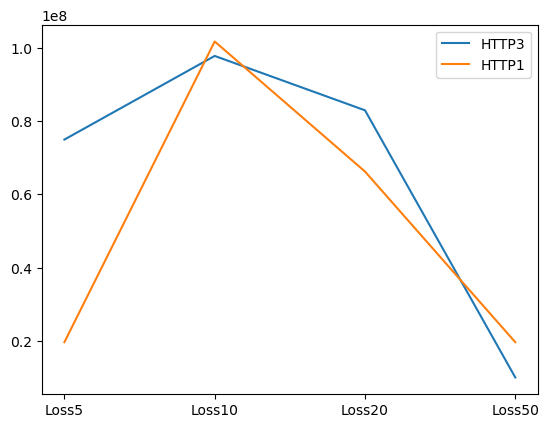

In [34]:
  
# plot lines
plt.plot(loss_percent, quic_throughputs, label = "HTTP3")
plt.plot(loss_percent, h1_throughputs, label = "HTTP1")

plt.legend()
plt.show()

In [73]:
congestion = "tbf0.5m32k70ms"
intervals = []

url_pre = 'https://10'

quic_intervals = {}
for key in quic_tbf.keys():
    if congestion in key:
        datas = quic_tbf[key]
        for data in datas:
            if 'protocol' in data and data['protocol']=="h3":
                abs_time = data["timing"]["requestTime"]
                quic_intervals[data["url"]]= (((abs_time+data["timing"]["sendStart"]),(abs_time+data["timing"]["receiveHeadersEnd"])))

h1_intervals = {}

url_pre = 'https://10.10.1.2'
for key in h1_tbf.keys():
    if congestion in key:
        datas = h1_tbf[key]
        for data in datas:
            if "url" in data and url_pre in data['url']:
                abs_time = data["timing"]["requestTime"]
                h1_intervals[data["url"]] = ((abs_time+data["timing"]["sendStart"]),(abs_time+data["timing"]["receiveHeadersEnd"]))
            elif "url" in data and data['url'] in quic_intervals.keys():
                abs_time = data["timing"]["requestTime"] 
                h1_intervals[data["url"]] = ((abs_time+data["timing"]["sendStart"]),(abs_time+data["timing"]["receiveHeadersEnd"]))
                





                                      
                                      
                                      


['https://10.10.1.2:8000/', 'https://10.10.1.2:8000/_images/about/economic-impact-report/img-stats-number-one-public-service.jpg', 'https://10.10.1.2:8000/_images/about/economic-impact-report/img-stats-top-ten.jpg', 'https://10.10.1.2:8000/_images/homepage/img-feat-Brand%20video.jpg', 'https://10.10.1.2:8000/_images/homepage/img-financial-aid-scholorships.jpg', 'https://10.10.1.2:8000/_images/homepage/img-hero-2223-254-ACC-Attrition-CommenceSiteHero-2800x1446-v1.jpg', 'https://10.10.1.2:8000/_images/homepage/img-our-thriving-student-life.jpg', 'https://10.10.1.2:8000/_images/homepage/img-research-and-innovation.jpg', 'https://10.10.1.2:8000/_images/homepage/news/img-news-Grad_Story_2_Image.jpeg', 'https://10.10.1.2:8000/_images/homepage/news/img-news-Scripps-Pedestrian-Bridge-705.jpeg', 'https://10.10.1.2:8000/_images/homepage/news/img-news-new-cap-message-.jpeg', 'https://10.10.1.2:8000/_resources/css/custom-img.css', 'https://www.youtube.com/iframe_api']


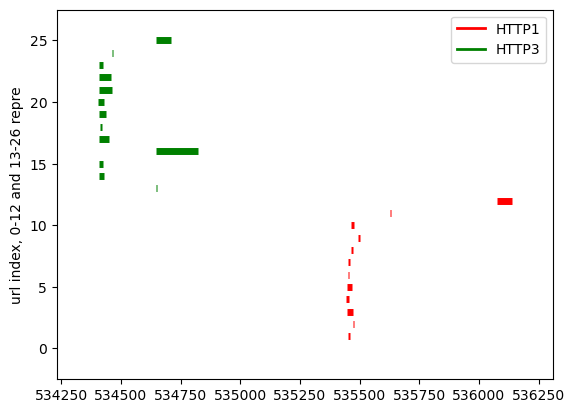

In [103]:
from matplotlib.lines import Line2D # Imported for legends
from matplotlib import collections  as mc
intervals = []

keys = sorted(h1_intervals.keys())
print(keys)
for k in keys:
    intervals.append(h1_intervals[k])
    
for k in keys:
    k = k.replace(':8000',':4433')
    intervals.append(quic_intervals[k])

keys.extend(keys)


num_intervals = len(intervals)
viridis = plt.cm.get_cmap('viridis', 2)

color_choice = ['r', 'g']
colors = [color_choice[0] if i< num_intervals//2 else color_choice[1] for i in range(num_intervals)]

# Prepare the input data in correct format for LineCollection 
lines = [[(i[0], j), (i[1], j)] for i, j in zip(intervals, range(len(intervals)))]

lc = mc.LineCollection(lines, colors= colors, linewidths=5)
fig, ax = plt.subplots()

ax.add_collection(lc)
ax.margins(0.1)

ax.set_ylabel('url index, 0-12 and 13-26 repre')


# Adding the legends
def make_proxy(col, scalar_mappable, **kwargs):
    color = col 
    return Line2D([0, 1], [0, 1], color=color, **kwargs)
proxies = [make_proxy(c, lc, linewidth=2) for c in color_choice]
ax.legend(proxies, ['HTTP1', 'HTTP3'])

